In [25]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, recall_score, precision_score,make_scorer
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
np.random.seed(25)
import os

In [26]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.size'] = 15

In [27]:
train = pd.read_csv("train.csv",header=None)
test = pd.read_csv("test.csv",header=None)

In [28]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,447095,3452,111,22,433,214,3677,252,210,74,3316,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,113427,3093,95,9,124,7,4115,234,227,124,2930,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,66435,2551,61,17,90,5,726,231,202,98,751,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,8957,2944,135,3,430,13,1868,224,238,149,1199,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,434631,3030,327,34,277,101,1973,120,181,190,1693,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [29]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,258918,2352,293,23,256,45,201,151,228,215,799,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,258134,2790,88,8,330,35,1400,232,227,128,726,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,165265,2826,115,7,162,24,1020,232,233,134,2044,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,522141,3234,137,16,150,20,968,243,232,112,2536,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,569662,2810,58,22,124,25,3293,230,188,80,1624,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
header = pd.read_csv('../input/header.csv')
header.head()

,key,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,label
0,K,N,N,N,N,N,N,N,N,N,N,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,L


In [31]:
columns = train.columns
new_columns = []
for i in range(len(columns)):
    if i == 0:
        new_columns.append('key')
    elif i == (len(columns) - 1):
        new_columns.append('label')
    else:
        new_columns.append("V"+str(i))
    
train.columns = new_columns

In [32]:
columns = test.columns
new_columns = []
for i in range(len(columns)):
    if i == 0:
        new_columns.append('key')
    else:
        new_columns.append("V"+str(i))
    
test.columns = new_columns

In [33]:
train.isnull().sum(axis=0)

key      0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
V35      0
V36      0
V37      0
V38      0
V39      0
V40      0
V41      0
V42      0
V43      0
V44      0
V45      0
V46      0
V47      0
V48      0
V49      0
V50      0
V51      0
V52      0
V53      0
V54      0
label    0
dtype: int64

In [34]:
train.duplicated().sum()

0

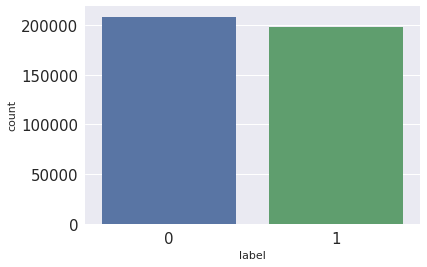

In [35]:
sns.countplot(train['label'])

In [36]:
col=train.columns
for i in col:
    if train[i].sum() == 0:
        print(i)

No Column with all zero values.

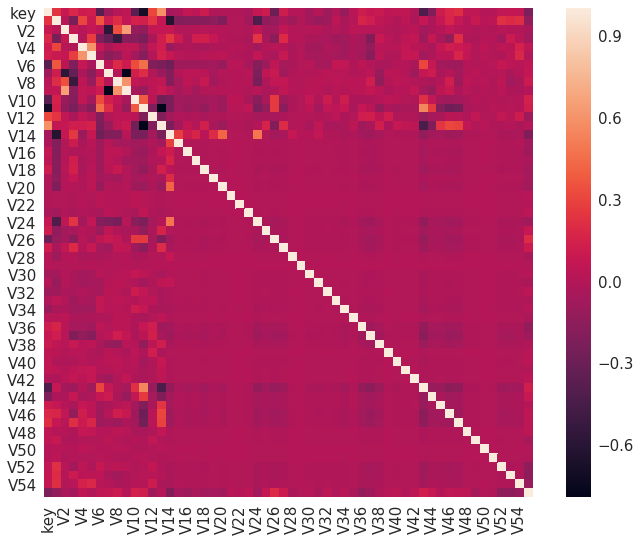

In [37]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [38]:
feature_names = [x for x in train.columns if x not in ['key']]

In [39]:
# from patsy import dmatrices
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# df = train[feature_names].copy()
# feature_names = [x for x in df.columns if x not in ['label']]
# #gather features
# features = "+".join(df[feature_names].columns)

# # get y and X dataframes based on this regression:
# y, X = dmatrices('label ~' + features, df, return_type='dataframe')

In [40]:
# # For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns

# vif.round(1)

In [41]:
feature_names = [x for x in train.columns if x not in ['key', 'label','V7','V8','V9']]
target = train['label']

In [42]:
train[feature_names].head()

,V1,V2,V3,V4,V5,V6,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54
0,3452,111,22,433,214,3677,3316,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3093,95,9,124,7,4115,2930,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2551,61,17,90,5,726,751,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2944,135,3,430,13,1868,1199,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3030,327,34,277,101,1973,1693,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
cat_columns = np.arange(7,51)
cat_columns

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [49]:
model = ExtraTreesClassifier(n_estimators=500)#CatBoostClassifier(eval_metric='AUC', random_seed=42,verbose=False)
## model training and prediction
#model.fit(train[feature_names],target,cat_features=cat_columns)
model.fit(train[feature_names],target)
pred2 = model.predict_proba(test[feature_names])[:,1]

In [50]:
model.feature_importances_

array([2.20837730e-01, 8.57904879e-02, 5.59408051e-02, 7.55322516e-02,
       7.27364421e-02, 1.39134879e-01, 1.27335579e-01, 9.04722087e-03,
       4.72830706e-03, 9.80732833e-03, 2.84199632e-02, 5.52831306e-04,
       5.83444104e-03, 7.16300854e-04, 5.59211116e-03, 1.92003660e-04,
       1.02331231e-03, 7.20769963e-05, 6.90855829e-05, 4.56311023e-04,
       3.20646983e-03, 4.27461551e-03, 2.63566856e-02, 7.37275029e-03,
       2.84534965e-04, 4.87562751e-08, 9.96872047e-04, 1.13100712e-03,
       9.43435666e-04, 1.30915252e-03, 2.22681666e-03, 1.17927800e-03,
       1.67705643e-02, 9.83022245e-03, 4.25689185e-03, 4.71566586e-04,
       1.54652189e-03, 9.46195659e-04, 7.45590868e-04, 8.98249721e-03,
       4.79638264e-03, 3.60306556e-03, 4.67573742e-03, 4.17181938e-03,
       1.51107729e-03, 1.61688428e-03, 7.89622674e-05, 1.80481376e-04,
       1.74998434e-02, 1.65682864e-02, 8.64627412e-03])

In [51]:
pred = pred2#pred1 * 0.5 + pred2 * 0.5

In [52]:
## make submission
sub = pd.DataFrame()
sub['key'] = test['key']
sub['score'] = pred
sub.to_csv('result.csv', index=False)

In [53]:
sub.head()

,key,score
0,258918,0.656
1,258134,0.970
2,165265,0.572
3,522141,0.756
4,569662,0.982
